In [ ]:
:orphan:

In [5]:
from katsu.mueller import linear_diattenuator
from katsu.katsu_math import np, condition_number

import matplotlib.pyplot as plt
plt.style.use('bmh')

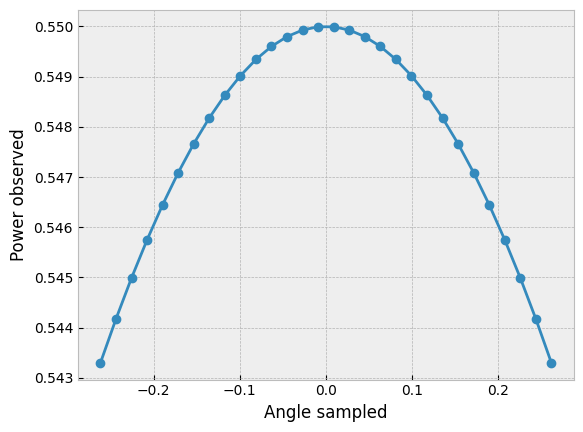

In [9]:
# Set up an exoplanet stokes vector
S_exo = np.array([1, 0.1, 0, 0])
NMEAS = 30

# put together the data reduction matrix
angles = np.linspace(-15, 15, NMEAS)
angles = np.radians(angles)
analyzer = linear_diattenuator(a=angles, Tmin=0, shape=[NMEAS])

# data reduction matrix is just the top row
W = analyzer[..., 0]
P = W @ S_exo

plt.figure()
plt.plot(angles, P, marker='o')
plt.ylabel('Power observed')
plt.xlabel('Angle sampled')
plt.show()

In [12]:
# solve for the Stokes vector
Winv = np.linalg.pinv(W)
print(f'Condition Number = {condition_number(Winv)}')
S_measure = Winv @ P
print(S_measure)

Condition Number = 47.741373932094504
[1.00000000e+00 1.00000000e-01 1.94289029e-16 0.00000000e+00]
